In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams.update({'font.size': 12})

In [6]:
zs,rs = np.genfromtxt("comovingD.dat").T
zs[8]
znmids = np.arange(1,len(zs),2)
print(znmids,zs[znmids])


VzTotal = 4.*np.pi/3. * (rs[-1]**3-rs[0]**3)
VzTotal

Vzs = np.array([4.*np.pi/3. * (rs[i+1]**3-rs[i-1]**3) for i in znmids])

[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27] [32.5 37.5 42.5 47.5 52.5 57.5 62.5 67.5 72.5 77.5 82.5 87.5 92.5 97.5]


In [7]:
# dat1 = np.genfromtxt("FisherBaselineSec0.1.dat")
# dat2 = np.genfromtxt("FisherBaselineSec0.01.dat")
# dat3 = np.genfromtxt("FisherBaselineSec0.001.dat")

# datafull = np.concatenate((dat1,dat2,dat3))

# np.savetxt("FisherBaselineSec.dat",datafull)

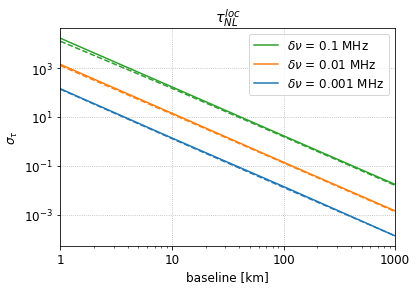

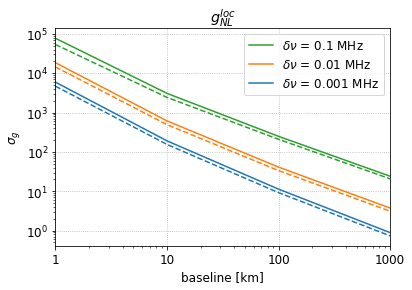

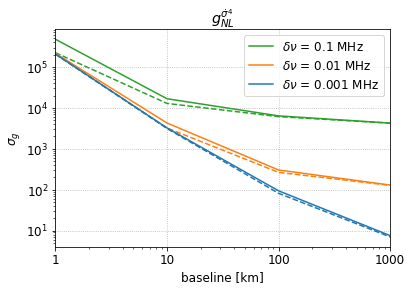

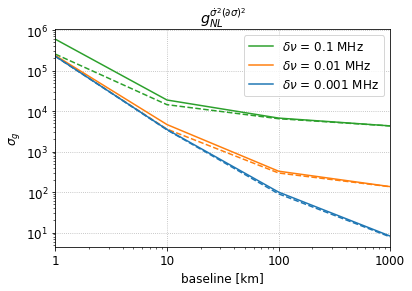

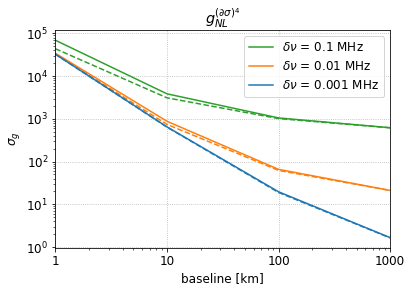

In [16]:
baselines = [1,10,100,1000]
windows = [0.1,0.01,0.001]
n_z = 14
colors = ["tab:blue","tab:orange","tab:green"][::-1]
shapes = ["TtauNL","TgNL","Teq1","Teq2","Teq3"]
shape_labels = ["$\\tau_{NL}^{loc}$","$g_{NL}^{loc}$",'$g_{NL}^{\dot{\sigma}^4}$','$g_{NL}^{\dot{\sigma}^2(\partial\sigma)^2}$','$g_{NL}^{(\partial \sigma)^4}$']

for si,shape in enumerate(shapes):
    Fish = np.zeros((len(windows),len(baselines),len(znmids[:n_z]),8,8))

    for i in range(1):
        SecDat = np.genfromtxt(f"FisherBaselineSec.dat")
        PrimDat = np.genfromtxt(f"FisherBaselineSec{shape}.dat")

#         SecDat[:,-2] *= np.random.normal(loc=1,scale=SecDat[:,-1])
#         PrimDat[:,-2] *= np.random.normal(loc=1,scale=PrimDat[:,-1])

        a=0
        for wi,window in enumerate(windows):
            for bi, base in enumerate(baselines):
                for zi,zn in enumerate(znmids[:n_z]):
                    for S1 in range(7):
                        for S2 in range(S1,7):
                            Fish[wi,bi,zi,S1,S2] = Fish[wi,bi,zi,S2,S1] = SecDat[a,-2]
                            a+=1

        a=0
        for wi,window in enumerate(windows):
            for bi, base in enumerate(baselines):
                for zi,zn in enumerate(znmids[:n_z]):
                    for S1 in range(8):
                        Fish[wi,bi,zi,S1,-1] = Fish[wi,bi,zi,-1,S1] = PrimDat[a,-2]
                        a+=1

        FishTotal = np.sum(Fish,axis=2)
        FishTotalInv = np.linalg.inv(FishTotal)

        [plt.loglog(baselines,FishTotal[wi,:,-1,-1]**(-1/2),"--",color=colors[wi]) for wi in range(len(windows))]
        [plt.loglog(baselines,FishTotalInv[wi,:,-1,-1]**(1/2),color=colors[wi],label=f"$\\delta\\nu$ = {windows[wi]} MHz") for wi in range(len(windows))]
    plt.grid(linestyle=":")
    plt.title(f"{shape_labels[si]}")
    plt.xlim(1,1000)
    plt.xlabel("baseline [km]")
    plt.xticks(baselines,[str(ba) for ba in baselines])
    if si==0:
        plt.ylabel("$\\sigma_{\\tau}$")
    else:
        plt.ylabel("$\\sigma_g$")
    plt.legend()
    plt.savefig(f"Trispectrum{shape}Baseline.pdf",format='pdf',bbox_inches = 'tight')
    plt.show()

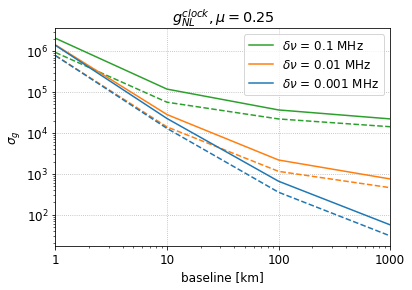

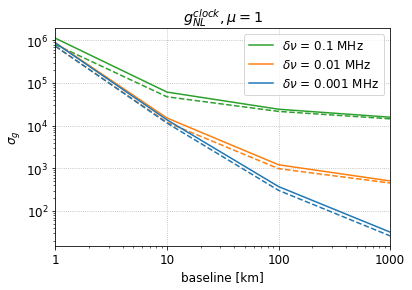

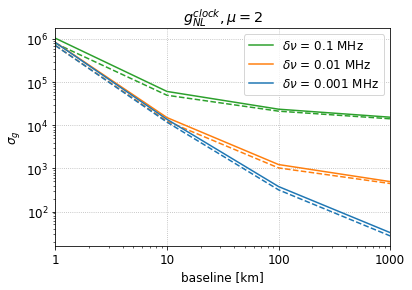

In [19]:
baselines = [1,10,100,1000]
windows = [0.1,0.01,0.001]
n_z = 14
colors = ["tab:blue","tab:orange","tab:green"][::-1]
mus = [0.25,1,2]
shapes = ["TtauNL","TgNL","Teq1","Teq2","Teq3"]
for mi,mu in enumerate(mus):
    Fish = np.zeros((len(windows),len(baselines),len(znmids[:n_z]),7+5+1,7+5+1))

    for i in range(1):
        SecDat = np.genfromtxt(f"FisherBaselineSec.dat")
        SecClockDat = np.genfromtxt(f"FisherBaselineSecTClock{mu}.dat")
        PrimDat = np.genfromtxt(f"FisherBaselinePrim.dat")
        PrimClockDat = np.genfromtxt(f"FisherBaselinePrimTClock{mu}.dat")
        

        SecDat[:,-2] *= np.random.normal(loc=1,scale=SecDat[:,-1])
        PrimDat[:,-2] *= np.random.normal(loc=1,scale=PrimDat[:,-1])
        PrimClockDat[:,-2] *= np.random.normal(loc=1,scale=PrimClockDat[:,-1])
        SecClockDat[:,-2] *= np.random.normal(loc=1,scale=SecClockDat[:,-1])

        a=0
        for wi,window in enumerate(windows):
            for bi, base in enumerate(baselines):
                for zi,zn in enumerate(znmids[:n_z]):
                    for S1 in range(7):
                        for S2 in range(S1,7):
                            Fish[wi,bi,zi,S1,S2] = Fish[wi,bi,zi,S2,S1] = SecDat[a,-2]
                            a+=1
                            
        a=0
        for wi,window in enumerate(windows):
            for bi, base in enumerate(baselines):
                for zi,zn in enumerate(znmids[:n_z]):
                    for S1 in range(7,7+5):
                        for S2 in range(S1+1,7+5):
                            Fish[wi,bi,zi,S1,S2] = Fish[wi,bi,zi,S2,S1] = PrimDat[a,-2]
                            a+=1
        
        for si,shape in enumerate(shapes):
            SecPrimDat = np.genfromtxt(f"FisherBaselineSec{shape}.dat")
            SecPrimDat[:,-2] *= np.random.normal(loc=1,scale=SecPrimDat[:,-1])
            
            a=0
            for wi,window in enumerate(windows):
                for bi, base in enumerate(baselines):
                    for zi,zn in enumerate(znmids[:n_z]):
                        for S1 in range(8):
                            if S1 == 7:
                                Fish[wi,bi,zi,S1+si,7+si] = Fish[wi,bi,zi,7+si,S1+si] = SecPrimDat[a,-2]
                            else:
                                Fish[wi,bi,zi,S1,7+si] = Fish[wi,bi,zi,7+si,S1] = SecPrimDat[a,-2]
                            a+=1
            
        a=0
        for wi,window in enumerate(windows):
            for bi, base in enumerate(baselines):
                for zi,zn in enumerate(znmids[:n_z]):
                    for S1 in range(7,7+5):
                        Fish[wi,bi,zi,S1,-1] = Fish[wi,bi,zi,-1,S1] = PrimClockDat[a,-2]
                        a+=1    
            
                            
        a=0
        for wi,window in enumerate(windows):
            for bi, base in enumerate(baselines):
                for zi,zn in enumerate(znmids[:n_z]):
                    for S1 in range(8):
                        if S1 == 7:
                            Fish[wi,bi,zi,-1,-1] = Fish[wi,bi,zi,-1,-1] = SecClockDat[a,-2]
                        else:
                            Fish[wi,bi,zi,S1,-1] = Fish[wi,bi,zi,-1,S1] = SecClockDat[a,-2]
                        a+=1
        
        FishTotal = np.sum(Fish,axis=2)
        FishTotalNoSec = FishTotal[:,:,7:,7:]
        FishTotalInv = np.linalg.inv(FishTotal)
        FishTotalNoSecInv = np.linalg.inv(FishTotalNoSec)

        [plt.loglog(baselines,FishTotal[wi,:,-1,-1]**(-1/2),"--",color=colors[wi]) for wi in range(len(windows))]
        [plt.loglog(baselines,FishTotalInv[wi,:,-1,-1]**(1/2),color=colors[wi],label=f"$\\delta\\nu$ = {windows[wi]} MHz") for wi in range(len(windows))]
#         [plt.loglog(baselines,FishTotalNoSecInv[wi,:,-1,-1]**(1/2),"-.",color=colors[wi]) for wi in range(len(windows))]
    plt.grid(linestyle=":")
    plt.title("$g_{NL}^{clock},"+f"\\mu = {mu}$")
    plt.xlim(1,1000)
    plt.xlabel("baseline [km]")
    plt.xticks(baselines,[str(ba) for ba in baselines])
    plt.ylabel("$\\sigma_g$")
    plt.legend()
    plt.savefig(f"TrispectrumClock{mu}Baseline.pdf",format='pdf',bbox_inches = 'tight')
    plt.show()

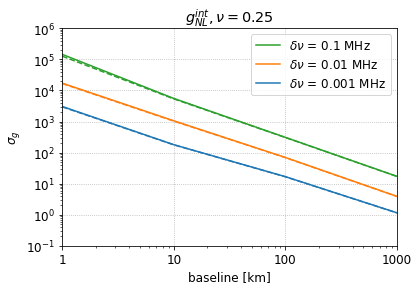

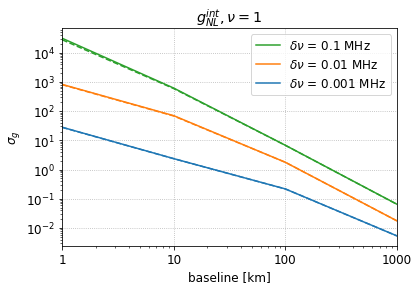

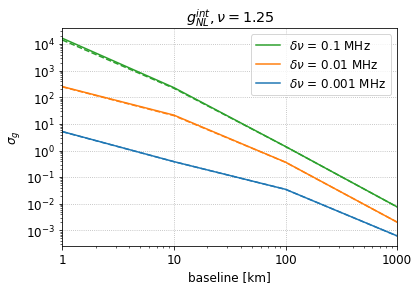

In [24]:
baselines = [1,10,100,1000]
windows = [0.1,0.01,0.001]
n_z = 14
colors = ["tab:blue","tab:orange","tab:green"][::-1]
mus = [0.25,1,1.25]
shapes = ["TtauNL","TgNL","Teq1","Teq2","Teq3"]
for mi,mu in enumerate(mus):
    Fish = np.zeros((len(windows),len(baselines),len(znmids[:n_z]),7+5+1,7+5+1))

    for i in range(1):
        SecDat = np.genfromtxt(f"FisherBaselineSec.dat")
        SecClockDat = np.genfromtxt(f"FisherBaselineSecTInt{mu}.dat")
        PrimDat = np.genfromtxt(f"FisherBaselinePrim.dat")
        PrimClockDat = np.genfromtxt(f"FisherBaselinePrimTInt{mu}.dat")
        

        SecDat[:,-2] *= np.random.normal(loc=1,scale=SecDat[:,-1])
        PrimDat[:,-2] *= np.random.normal(loc=1,scale=PrimDat[:,-1])
        PrimClockDat[:,-2] *= np.random.normal(loc=1,scale=PrimClockDat[:,-1])
        SecClockDat[:,-2] *= np.random.normal(loc=1,scale=SecClockDat[:,-1])

        a=0
        for wi,window in enumerate(windows):
            for bi, base in enumerate(baselines):
                for zi,zn in enumerate(znmids[:n_z]):
                    for S1 in range(7):
                        for S2 in range(S1,7):
                            Fish[wi,bi,zi,S1,S2] = Fish[wi,bi,zi,S2,S1] = SecDat[a,-2]
                            a+=1
                            
        a=0
        for wi,window in enumerate(windows):
            for bi, base in enumerate(baselines):
                for zi,zn in enumerate(znmids[:n_z]):
                    for S1 in range(7,7+5):
                        for S2 in range(S1+1,7+5):
                            Fish[wi,bi,zi,S1,S2] = Fish[wi,bi,zi,S2,S1] = PrimDat[a,-2]
                            a+=1
        
        for si,shape in enumerate(shapes):
            SecPrimDat = np.genfromtxt(f"FisherBaselineSec{shape}.dat")
            SecPrimDat[:,-2] *= np.random.normal(loc=1,scale=SecPrimDat[:,-1])
            
            a=0
            for wi,window in enumerate(windows):
                for bi, base in enumerate(baselines):
                    for zi,zn in enumerate(znmids[:n_z]):
                        for S1 in range(8):
                            if S1 == 7:
                                Fish[wi,bi,zi,S1+si,7+si] = Fish[wi,bi,zi,7+si,S1+si] = SecPrimDat[a,-2]
                            else:
                                Fish[wi,bi,zi,S1,7+si] = Fish[wi,bi,zi,7+si,S1] = SecPrimDat[a,-2]
                            a+=1
            
        a=0
        for wi,window in enumerate(windows):
            for bi, base in enumerate(baselines):
                for zi,zn in enumerate(znmids[:n_z]):
                    for S1 in range(7,7+5):
                        Fish[wi,bi,zi,S1,-1] = Fish[wi,bi,zi,-1,S1] = PrimClockDat[a,-2]
                        a+=1    
            
                            
        a=0
        for wi,window in enumerate(windows):
            for bi, base in enumerate(baselines):
                for zi,zn in enumerate(znmids[:n_z]):
                    for S1 in range(8):
                        if S1 == 7:
                            Fish[wi,bi,zi,-1,-1] = Fish[wi,bi,zi,-1,-1] = SecClockDat[a,-2]
                        else:
                            Fish[wi,bi,zi,S1,-1] = Fish[wi,bi,zi,-1,S1] = SecClockDat[a,-2]
                        a+=1
        
        FishTotal = np.sum(Fish,axis=2)
        FishTotalNoSec = FishTotal[:,:,7:,7:]
        FishTotalInv = np.linalg.inv(FishTotal)
        FishTotalNoSecInv = np.linalg.inv(FishTotalNoSec)

        [plt.loglog(baselines,FishTotal[wi,:,-1,-1]**(-1/2),"--",color=colors[wi]) for wi in range(len(windows))]
        [plt.loglog(baselines,FishTotalInv[wi,:,-1,-1]**(1/2),color=colors[wi],label=f"$\\delta\\nu$ = {windows[wi]} MHz") for wi in range(len(windows))]
#         [plt.loglog(baselines,FishTotalNoSecInv[wi,:,-1,-1]**(1/2),"-.",color=colors[wi]) for wi in range(len(windows))]
    plt.grid(linestyle=":")
    plt.title("$g_{NL}^{int},"+f"\\nu = {mu}$")
    plt.xlim(1,1000)
    plt.xlabel("baseline [km]")
    plt.xticks(baselines,[str(ba) for ba in baselines])
    plt.ylabel("$\\sigma_g$")
    if mi==0:
        plt.ylim(1e-1,1e6)
    plt.legend()
    plt.savefig(f"TrispectrumInt{mu}Baseline.pdf",bbox_inches = 'tight',format='pdf')
    plt.show()